# STA130 Homework #4

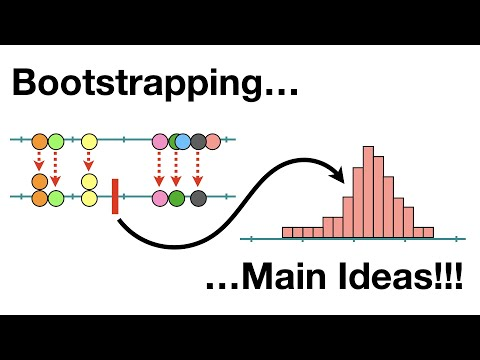

In [40]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

### 1. Standard Error of the Mean vs Standard Deviation of the Original Data

Standard deviation of our original data measures the variability of individual data points, showing how much these values deviate from the mean of our original data. It quantifies the spread of individual data points from our original data.

The Standard error of the mean (SEM) serves as the **standard deviation of our bootstrapped means** dataset. It deviates from the standard deviation of the original data as the SEM collects means from the original data set which are randomly sampled via bootstrapping and calculates the likelihood of a sampled mean differing from our original mean from the original dataset. SEM measures uncertainty in our mean measurement of the dataset, showing us how much our mean would change if the sampling process was replicated numerous times.

### 2. Creating a Confidence Interval Using the Standard Error of the Mean

1. Use bootstrapping to genereate resamples from the original data and calculate the mean of each resample.
2. Calculate SEM of bootstrap means by calculating it's standard deviation
3. Use a standard **normal approximation** based on SEM to create a confidence interval: **x-bar (sample mean) ±1.96 * SEM**


I asked for code implementation in Python so I can see how this is done:

In [41]:
import pandas as pd
import numpy as np

# Sample data (replace this with your actual data)
data = pd.Series([12, 15, 14, 10, 9, 13, 12, 16, 14, 11])

# Number of bootstrap resamples
n_bootstrap = 1000

# Function to perform bootstrapping and calculate sample means
def bootstrap_sample_means(data, n_bootstrap):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        # Generate a bootstrap sample with replacement
        bootstrap_sample = data.sample(len(data), replace=True)
        # Calculate the mean of the bootstrap sample
        bootstrap_means.append(bootstrap_sample.mean())
    return np.array(bootstrap_means)

# Get the bootstrap means
bootstrap_means = bootstrap_sample_means(data, n_bootstrap)

# Calculate the mean and standard error of the mean (SEM) of the bootstrap means
mean_bootstrap = bootstrap_means.mean()
sem_bootstrap = bootstrap_means.std()

# Create 95% confidence interval using SEM and the normal approximation
lower_bound = mean_bootstrap - 1.96 * sem_bootstrap
upper_bound = mean_bootstrap + 1.96 * sem_bootstrap

# OR, create 95% confidence interval using percentiles of bootstrap means
lower_percentile = np.percentile(bootstrap_means, 2.5)
upper_percentile = np.percentile(bootstrap_means, 97.5)

# Output results
print(f"Bootstrapped Mean: {mean_bootstrap:.2f}")
print(f"95% CI using SEM: ({lower_bound:.2f}, {upper_bound:.2f})")
print(f"95% CI using Percentiles: ({lower_percentile:.2f}, {upper_percentile:.2f})")


Bootstrapped Mean: 12.62
95% CI using SEM: (11.30, 13.93)
95% CI using Percentiles: (11.20, 13.90)


### 3. Creating a 95% bootstrapped confidence interval using the bootstrapped means (w/o relying on std dev to est SEM)

To create a 95% bootstrapped confidence interval without relying on SEM, we could use percentiles (2.5th and 97.5th) of the bootstrapped means to compute the confidence interval directly. This method is **preffered when dealing with non symmetrical distributions, non normal distributions, skewed distributions, and data with outliers.** For normally distributed data and large sample size, use SEM to create 95% confidence interval.


### 4. Creating a 95% Bootstrap Confidence Interval for a Population Mean (and other parameters)

I prompted ChatGPT to create a 95% bootstrap confidence interval to calculate the population mean of the average amount of seasons played in a career of an NBA player. Since I don't have an actual data set, ChatGPT was kind enough to provide me an example data set containing 5 data points.

In [42]:
import pandas as pd
import numpy as np

# Replace with actual data (csv file)
nba_data = pd.DataFrame({
    'player': ['Player1', 'Player2', 'Player3', 'Player4', 'Player5'],
    'seasons': [5, 10, 7, 12, 8]  # Example seasons data
})

# Set number of resamples to bootstrap
n_bootstrap = 1000

# Function to conduct bootstrapping and calculate sample means from resampled data
def bootstrap_sample_means(data, n_bootstrap):
    bootstrap_means = []
    for _ in range(n_bootstrap): #for loop set to 1000 as stated in n_bootstrap
        # Generate a bootstrap sample with replacement flag set to True
        bootstrap_sample = data.sample(len(data), replace=True)
        # Calculate the mean of the bootstrap sample by appending means to bootstrap_sample and calling upon mean()
        bootstrap_means.append(bootstrap_sample['seasons'].mean())
    return np.array(bootstrap_means)

# Setting bootstrapped sample means to variable bootstrap_means
bootstrap_means = bootstrap_sample_means(nba_data, n_bootstrap)

# Calculate the mean and standard error of the mean (SEM) of the bootstrap means (by calc std dev)
mean_bootstrap = bootstrap_means.mean()
sem_bootstrap = bootstrap_means.std()

# Bounds bootstrapped mean +- range of 1.96 and multiplies by SEM to generate 95% confidence interval (normal approx)
lower_bound = mean_bootstrap - 1.96 * sem_bootstrap
upper_bound = mean_bootstrap + 1.96 * sem_bootstrap

# Using 2.5th and 97.5th percentiles of bootstrap means to generate 95% confidence interval
lower_percentile = np.percentile(bootstrap_means, 2.5)
upper_percentile = np.percentile(bootstrap_means, 97.5)

# Prints string with results of bootstrapped mean, and 95% confidence intervals using both methods
print(f"Bootstrapped Mean: {mean_bootstrap:.2f} seasons")
print(f"95% CI using SEM: ({lower_bound:.2f}, {upper_bound:.2f}) seasons")
print(f"95% CI using Percentiles: ({lower_percentile:.2f}, {upper_percentile:.2f}) seasons")


Bootstrapped Mean: 8.45 seasons
95% CI using SEM: (6.35, 10.54) seasons
95% CI using Percentiles: (6.40, 10.60) seasons


**To calculate median instead, we simply change method from .mean() to .median() and use np.median instead of np.mean.**

In [43]:
import pandas as pd
import numpy as np

# Example data: Replace this with actual NBA player data
# Assume this DataFrame contains a 'seasons' column representing seasons played by each player
nba_data = pd.DataFrame({
    'player': ['Player1', 'Player2', 'Player3', 'Player4', 'Player5'],
    'seasons': [5, 10, 7, 12, 8]  # Example seasons data
})

# Number of bootstrap resamples
n_bootstrap = 1000

# Function to perform bootstrapping and calculate sample medians
def bootstrap_sample_medians(data, n_bootstrap):
    bootstrap_medians = []
    for _ in range(n_bootstrap):
        # Generate a bootstrap sample with replacement
        bootstrap_sample = data.sample(len(data), replace=True)
        # Calculate the median of the bootstrap sample
        bootstrap_medians.append(bootstrap_sample['seasons'].median()) #.median() replaces .mean()
    return np.array(bootstrap_medians)

# Get the bootstrap medians
bootstrap_medians = bootstrap_sample_medians(nba_data, n_bootstrap)

# Calculate the median and standard error of the median (SEM) of the bootstrap medians
median_bootstrap = np.median(bootstrap_medians) #np.median replaces np.mean
sem_bootstrap = bootstrap_medians.std()

# Create 95% confidence interval using SEM and the normal approximation
lower_bound = median_bootstrap - 1.96 * sem_bootstrap
upper_bound = median_bootstrap + 1.96 * sem_bootstrap

# OR, create 95% confidence interval using percentiles of bootstrap medians
lower_percentile = np.percentile(bootstrap_medians, 2.5)
upper_percentile = np.percentile(bootstrap_medians, 97.5)

# Output results
print(f"Bootstrapped Median: {median_bootstrap:.2f} seasons")
print(f"95% CI using SEM: ({lower_bound:.2f}, {upper_bound:.2f}) seasons")
print(f"95% CI using Percentiles: ({lower_percentile:.2f}, {upper_percentile:.2f}) seasons")


Bootstrapped Median: 8.00 seasons
95% CI using SEM: (4.78, 11.22) seasons
95% CI using Percentiles: (5.00, 12.00) seasons


### 5. Distinguishing between the role of the population parameter and the sample sample statistic in context of confidence intervals

The **population parameter** is a fixed unknown we are simply trying to estimate (through mean, medium, etc.) Taking data from entire populations (which can be quite large) is extremely impractical, thus population parametrs are **impossible to know exactly**, we can only approximate.

**Sample sample statistic** refers to a measure we compute from a sample of data which is a subset of a population. Due to variablity from the random nature of sampling, the sample statistic may differ from another, therefore it is not fied. Take the sample mean or median as an example of a sample statistic, it is only an **estimate** of the population parameter.

The **confidence interval allows to quantify the uncertainty of the sample statistic by providing us a range of plausible values for our fixed population parameter**.

### 6. Informal explanations

#### What is Bootstrapping?
Bootstrapping is repeatedly taking points from a dataset (allowing for duplicates) and randomly and using those points to make a new dataset. From this new dataset, we calculate something, for example we could take the average by adding up values and dividing it by the number of values. We repeat this process numerous amount of times until we are satisfied. Then, we take our calculation of all the data sets we have compiled and take the calculation of that data set. We can plot this final data set on any type of graph, but a bar graph works best as it allows us to see the distribution of the data.

#### What is the main purpose of bootstrapping?
The main purpose of bootstrapping is to save time, as it frees us from having to replicate an experiment over and over again and allows us to simulate an event or experiment any number of times we want.

#### Using bootstrapping to assess whether guess might be plausible
If we had a hypothesized guess of the average of a population with a sample of size n, we could use bootstrapping by repeatedly resampling with replacement and calculating the the bootstrapped mean of our popualation. With this, we may create a 95% confidence interval in order to see where our guess lies. If it lies within the 95% confidence interval created using bootstrapping, then we can assess that our hypothesized guess is plausible.

### 7. Why a confidence interval overlapping zero fails to reject the null hypothesis

When a confidence interval contains zero, it means **zero is a possible value** for the true population parameter. The null hypotheses essentially states that the effect or difference is **zero**.

Thus, if a confidence interval overlaps zero, zero is a possible value. Since zero belongs in our list of possible values, there is not enough evidence to reject the null hypothesis. Therefore, we can state that a confidence interval overlapping zero fails to reject the null hypothesis.

The observed sample mean statistic itself does not need to be zero for a confidince interval overlapping zero to "fail to reject the null hypothesis". The sample mean statistic is simply one approximation of many for the true population parameter.

On the other hand, to choose to reject the null hypothesis in our case, a confidence interval must not overlap with zero. Since zero is not a likely possible value, we can believe that there is a statisically significant effect or difference in our population parameter.

### Summary of ChatGPT Conversation


Summary of Conversation on Confidence Intervals and Hypothesis Testing

https://chatgpt.com/share/66ff08e9-a668-800f-8aa6-23f1205b4bef

Standard Error of the Mean vs. Standard Deviation:


The standard deviation (SD) measures the variability of individual data points in a dataset, while the standard error of the mean (SEM) quantifies how much the sample mean is expected to vary from the true population mean. The SEM decreases with larger sample sizes, providing a more precise estimate of the population mean.



Creating Confidence Intervals:




A 95% confidence interval can be constructed using the standard error to estimate the range within which the true population mean is likely to lie. This involves calculating the sample mean and then using the SEM to find the upper and lower bounds of the confidence interval.


Interpreting Confidence Intervals:

A confidence interval that does not include zero suggests strong evidence against the null hypothesis, leading to its rejection. Conversely, if the CI overlaps with zero, it indicates that there is not enough evidence to reject the null hypothesis.



Bootstrap Confidence Intervals:

We discussed using bootstrapping to estimate confidence intervals for both means and medians. The process involves resampling the data, calculating the statistic of interest (mean or median), and constructing a CI based on the distribution of these bootstrap samples.



Overlapping Zero and Failing to Reject the Null Hypothesis:

A confidence interval that overlaps zero means that zero is a plausible value for the population parameter, leading to a failure to reject the null hypothesis. This indicates that the sample data does not provide strong enough evidence to conclude that there is a significant difference or effect.



Key Takeaway:

To reject the null hypothesis in hypothesis testing, one would look for a confidence interval that does not overlap with zero. Such a CI suggests statistical significance and indicates that the sample data provides sufficient evidence to assert a difference or effect in the population.



### 8. Vaccine Data Analysis Assignment

In [44]:
df #Displaying the dataset

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


#### Introduction
We are presented with a data set containing information of ten patients and their health scores before, and after taking a vaccine.

To determine the effectiveness of this vaccine, we will be analyzing this data both visually and quantitatively through bootstrapping and confidence intervals in order to see if it rejects the Null Hypothesis.

#### The Null Hypothesis
The Null Hypothesis states that the effect of some variable is zero, hence the name, null. For our data, we will make two confidence intervals - one for health scores before the vaccine, and one for health scores after taking the vaccine. 

If these intervals overlap with each other, we have enough evidence to state that our data does not reject the null hypothesis. An overlap between the two intervals would indicate a possibility that our two health scores do not deviate from each other, and the vaccine has zero/null effect.

However, if our intervals do not overlap, we have enough evidence to state that our data rejects the null hypothesis and thus, the vaccine is effective.

#### Methodology Code & Explanations

As stated in the introduction, we will analyze this data through bootstrapping and confidence intervals. The code below performs the boostrapping process of repeatedly sampling random data points with replacement from our original data 1000 times and using each resampled dataset to calculate a mean. We then extract the 2.5th and 97.5th percentiles of our mean data to create our 95% confidence interval.

In [45]:
import pandas as pd
import numpy as np

# Data setup
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define the number of bootstrap samples
n_bootstraps = 1000

# Initialize arrays to store bootstrap statistics
initial_health_scores_means = np.zeros(n_bootstraps)
final_health_scores_means = np.zeros(n_bootstraps)

# Perform bootstrapping
for i in range(n_bootstraps):
    # Generate a bootstrap sample with replacement
    bootstrap_sample = df.sample(n=len(df), replace=True)
    
    # Calculate mean for the InitialHealthScore and FinalHealthScore
    initial_health_scores_means[i] = bootstrap_sample['InitialHealthScore'].mean()
    final_health_scores_means[i] = bootstrap_sample['FinalHealthScore'].mean()

# Calculate the 95% confidence intervals (2.5th and 97.5th percentiles)
initial_ci = np.percentile(initial_health_scores_means, [2.5, 97.5])
final_ci = np.percentile(final_health_scores_means, [2.5, 97.5])

# Print the results
print("95% Confidence Interval for Initial Health Score:", initial_ci)
print("95% Confidence Interval for Final Health Score:", final_ci)


95% Confidence Interval for Initial Health Score: [79.2 82.5]
95% Confidence Interval for Final Health Score: [83.1 85.4]


#### Data Visualization

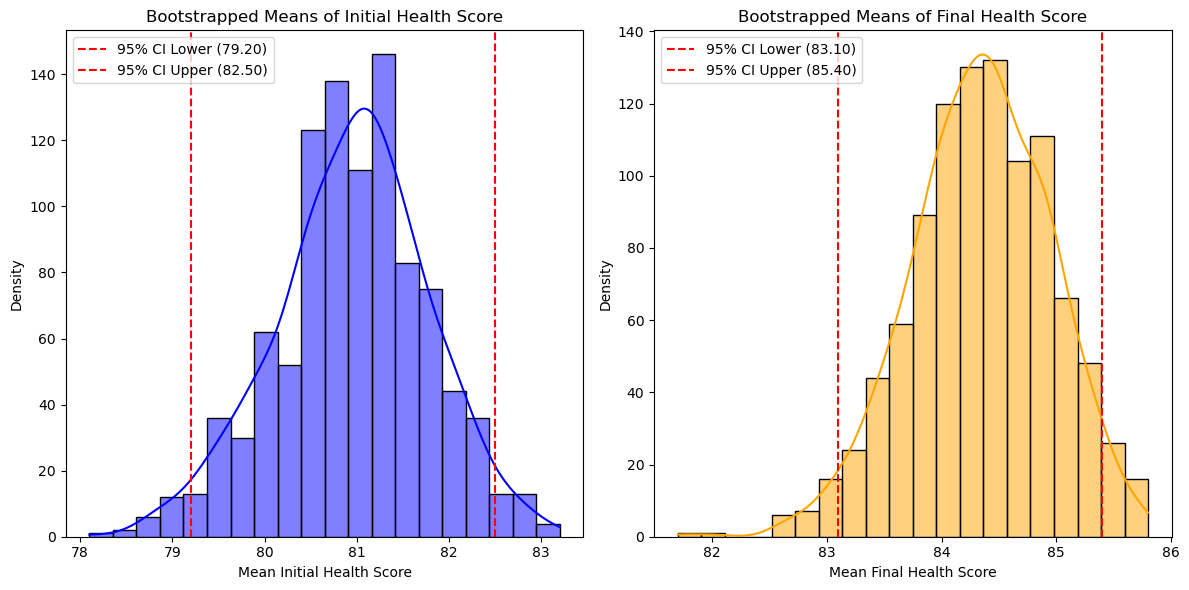

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plotting environment
plt.figure(figsize=(12, 6))

# Plot the histogram and KDE for Initial Health Score using Seaborn
plt.subplot(1, 2, 1)
sns.histplot(initial_health_scores_means, kde=True, color='blue', bins=20)
plt.axvline(initial_ci[0], color='red', linestyle='--', label=f'95% CI Lower ({initial_ci[0]:.2f})')
plt.axvline(initial_ci[1], color='red', linestyle='--', label=f'95% CI Upper ({initial_ci[1]:.2f})')
plt.title('Bootstrapped Means of Initial Health Score')
plt.xlabel('Mean Initial Health Score')
plt.ylabel('Density')
plt.legend()

# Plot the histogram and KDE for Final Health Score using Seaborn
plt.subplot(1, 2, 2)
sns.histplot(final_health_scores_means, kde=True, color='orange', bins=20)
plt.axvline(final_ci[0], color='red', linestyle='--', label=f'95% CI Lower ({final_ci[0]:.2f})')
plt.axvline(final_ci[1], color='red', linestyle='--', label=f'95% CI Upper ({final_ci[1]:.2f})')
plt.title('Bootstrapped Means of Final Health Score')
plt.xlabel('Mean Final Health Score')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


#### Analysis
As we can see above, the 95% confidence intervals taken from the initial health score and the final health score do not overlap - the lower bound of the final health score (83.1) is greater than the upper bound of the initial health score (82.5). Since there is no overlap between the two, the final interval mean is consistently higher than the initial health scores. 

#### Conclusion
From the results of our 95% confidence intervals not overlapping, we can state that this data rejects the Null Hypothesis, and the vaccine is effective. However, for further consideration, one could look to analyzing the correlation between age and sex (the other two factors we are given) in comparison to initial and final health scores.

### 9. Understanding Material

I consulted ChatGPT heavily, and I'll look to set up the wiki-textbook custom chatbot soon to help review for the upcoming test.